In [92]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [115]:
folder_path = 'runs/test_1/vel_0.5_temp_300'

pos_files = glob.glob(os.path.join(folder_path, '**', 'gr*.pos'), recursive=True)

print(pos_files)

['runs/test_1/vel_0.5_temp_300/pos/graphene.96200.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.68500.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.91000.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.60400.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.24500.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.4700.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.89400.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.33500.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.24200.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.73100.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.9700.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.98100.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.6200.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.100300.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.51200.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.63500.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.54900.pos', 'runs/test_1/vel_0.5_temp_300/pos/graphene.53400.pos', 'runs/test_

In [116]:
def count_data(filepath):
    coordinates = []

    with open(filepath, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("ITEM: TIMESTEP"):
                timestep = int(lines[lines.index(line) + 1].strip())
            if line.startswith("ITEM: ATOMS"):
                line_atom = line
                break

        for line in lines[lines.index(line_atom)+1:]:
            if line.strip():
                parts = line.split()
                if len(parts) >= 5:
                    x = float(parts[2])
                    y = float(parts[3])
                    z = float(parts[4])
                    vx = float(parts[5])
                    vy = float(parts[6])
                    vz = float(parts[7])
                    if len(parts) >=9:
                        c = float(parts[8])
                    else:
                        c = -1
                    coordinates.append([x, y, z, vx, vy, vz, c])
                    

    coordinates = np.array(coordinates)

    mean_coordinates = np.mean(coordinates, axis=0)

    #print(f"Timestep: {timestep}")
    #print(f"Средние координаты атомов (x, y, z): {mean_coordinates}"
    
    return np.append(mean_coordinates, timestep)

In [117]:
data = []

for filepath in pos_files:
    data.append(count_data(filepath))

In [118]:
df = pd.DataFrame(data, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'c', 'Step'])

In [119]:
df = df.sort_values(by='Step')
df

,x,y,z,vx,vy,vz,c,Step
1034,-0.015026,-0.052053,20.000000,0.000000,0.000000,0.000000,3.000000,0.0
510,-0.014246,-0.052128,19.993100,0.000000,0.000000,0.000000,3.000000,100.0
588,-0.014391,-0.052070,19.985692,0.000000,0.000000,0.000000,3.000000,200.0
1011,-0.014483,-0.052029,19.983300,0.000000,0.000000,0.000000,3.000000,300.0
89,-0.014541,-0.051969,19.984700,0.000000,0.000000,0.000000,3.000000,400.0
...,...,...,...,...,...,...,...,...
210,-0.108699,0.005847,19.972868,-0.000930,0.001853,0.006411,2.702381,117400.0
899,-0.108735,0.005921,19.973126,-0.000924,0.001851,0.006411,2.702381,117500.0
828,-0.108771,0.005995,19.973383,-0.000918,0.001849,0.006411,2.702381,117600.0
1176,-0.108809,0.006069,19.973637,-0.000912,0.001847,0.006410,2.702381,117700.0


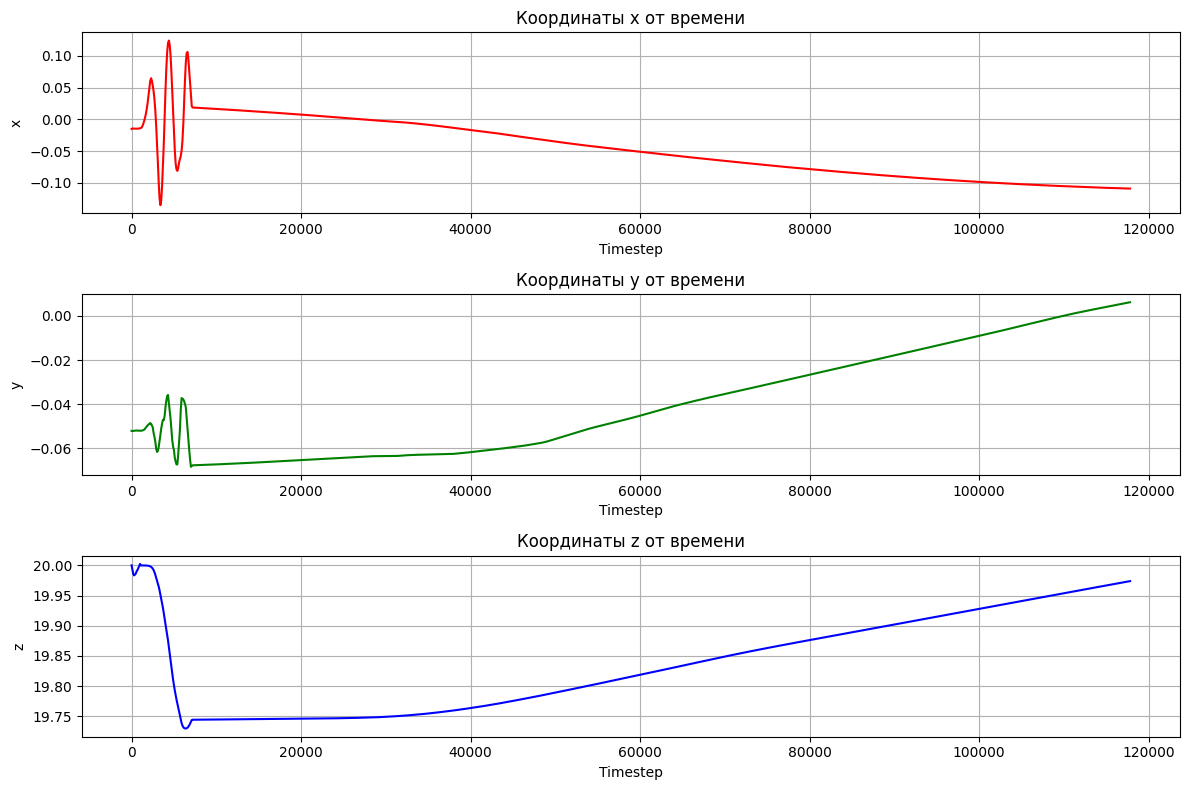

In [120]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df.Step, df.x, label='x', color='r')
plt.xlabel('Timestep')
plt.ylabel('x')
plt.title('Координаты x от времени')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df.Step, df.y, label='y', color='g')
plt.xlabel('Timestep')
plt.ylabel('y')
plt.title('Координаты y от времени')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df.Step, df.z, label='z', color='b')
plt.xlabel('Timestep')
plt.ylabel('z')
plt.title('Координаты z от времени')
plt.grid(True)

plt.tight_layout()
plt.show()

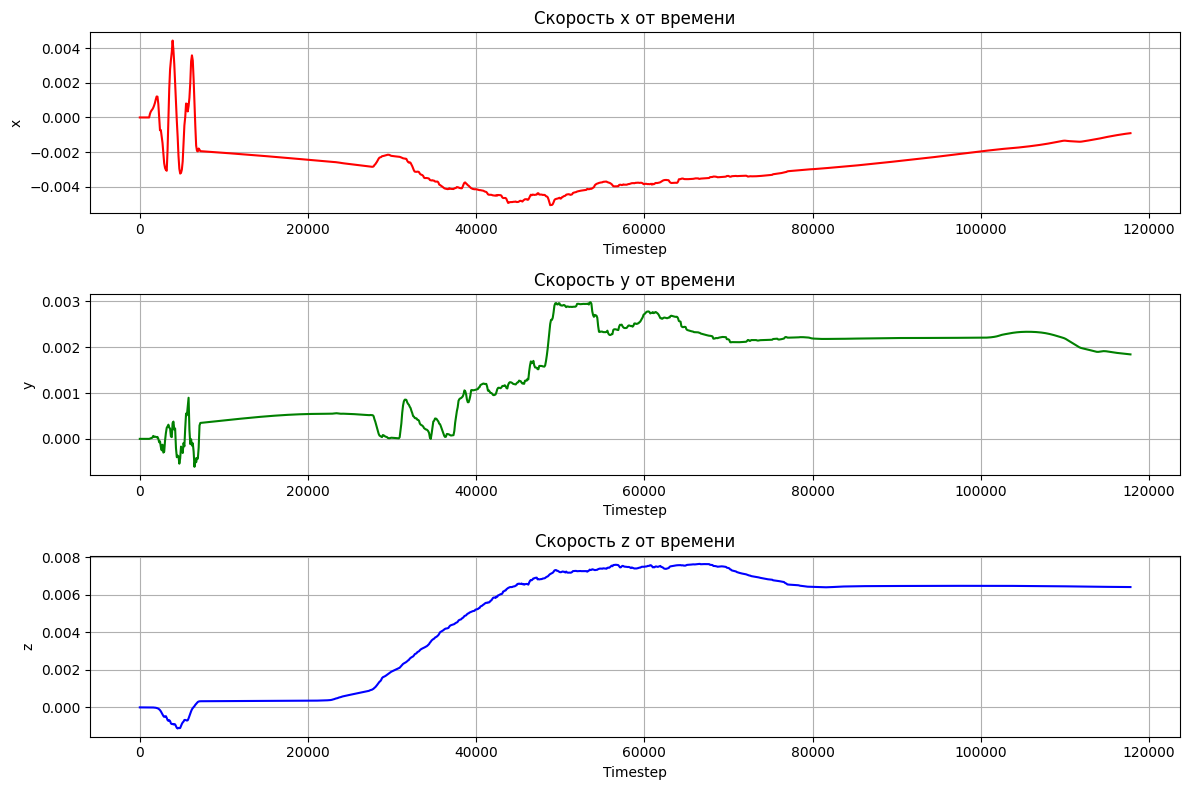

In [121]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df.Step, df.vx, label='x', color='r')
plt.xlabel('Timestep')
plt.ylabel('x')
plt.title('Скорость x от времени')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df.Step, df.vy, label='y', color='g')
plt.xlabel('Timestep')
plt.ylabel('y')
plt.title('Скорость y от времени')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df.Step, df.vz, label='z', color='b')
plt.xlabel('Timestep')
plt.ylabel('z')
plt.title('Скорость z от времени')
plt.grid(True)

plt.tight_layout()
plt.show()

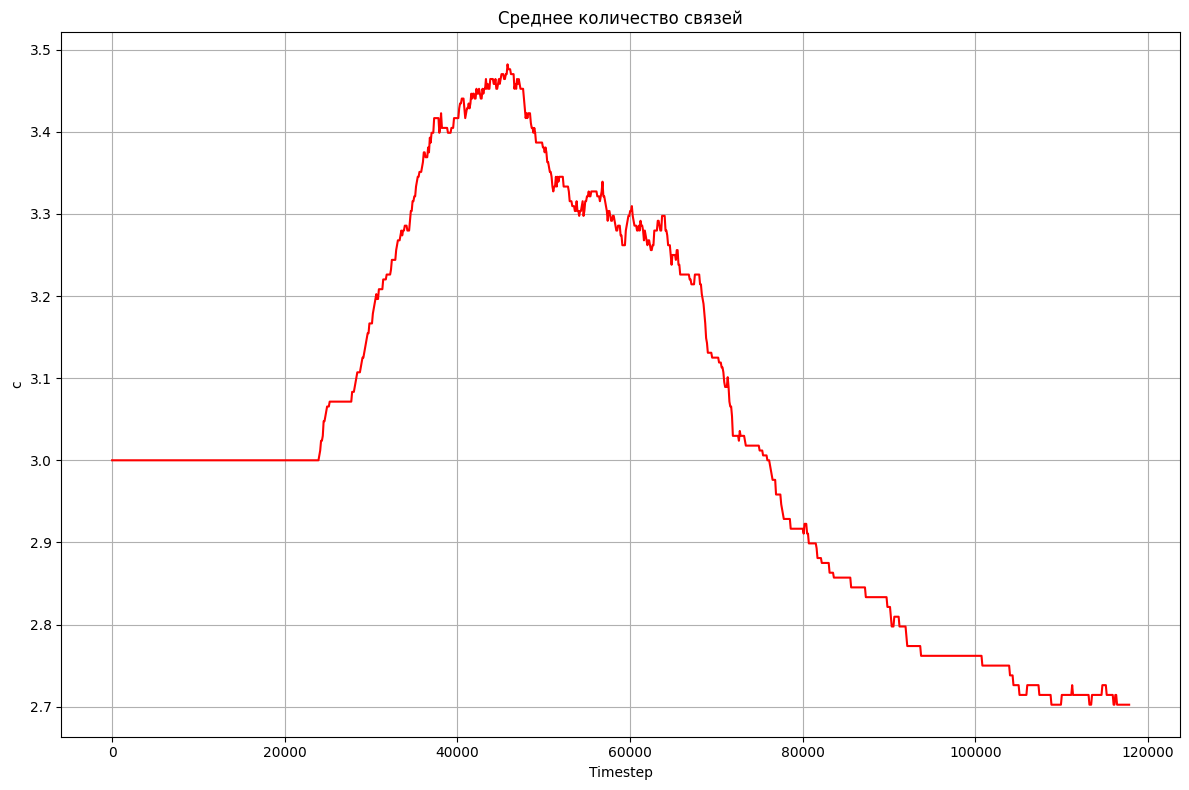

In [122]:
plt.figure(figsize=(12, 8))

plt.plot(df.Step, df.c, label='x', color='r')
plt.xlabel('Timestep')
plt.ylabel('c')
plt.title('Среднее количество связей')
plt.grid(True)

plt.tight_layout()
plt.show()

In [123]:
import re
import pandas as pd

def extract_lammps_data(log_file):
    with open(log_file, 'r') as file:
        log_data = file.read()

    pattern = r"\s*(\d+)\s+([\d\.]+)\s+([\d\.-]+)\s+([\d\.-]+)\s+([\d\.-]+)\s+([\d\.-]+)\s+([\d\.-]+)\s+([\d\.-]+)"

    matches = re.findall(pattern, log_data, re.MULTILINE)

    if matches:
        data = pd.DataFrame(matches, columns=['Step', 'Time', 'Temp', 'PotEng', 'KinEng', 'TotEng', 'Press', 'Volume'])
        
        data = data.apply(pd.to_numeric, errors='ignore')

        return data
    else:
        print("Совпадения не найдены.")
        return None

In [124]:
log_file = folder_path + '/log.lammps' 
data = extract_lammps_data(log_file)

data.Step.unique()

array([     0,    100,    200, ..., 115000, 115100, 115200])

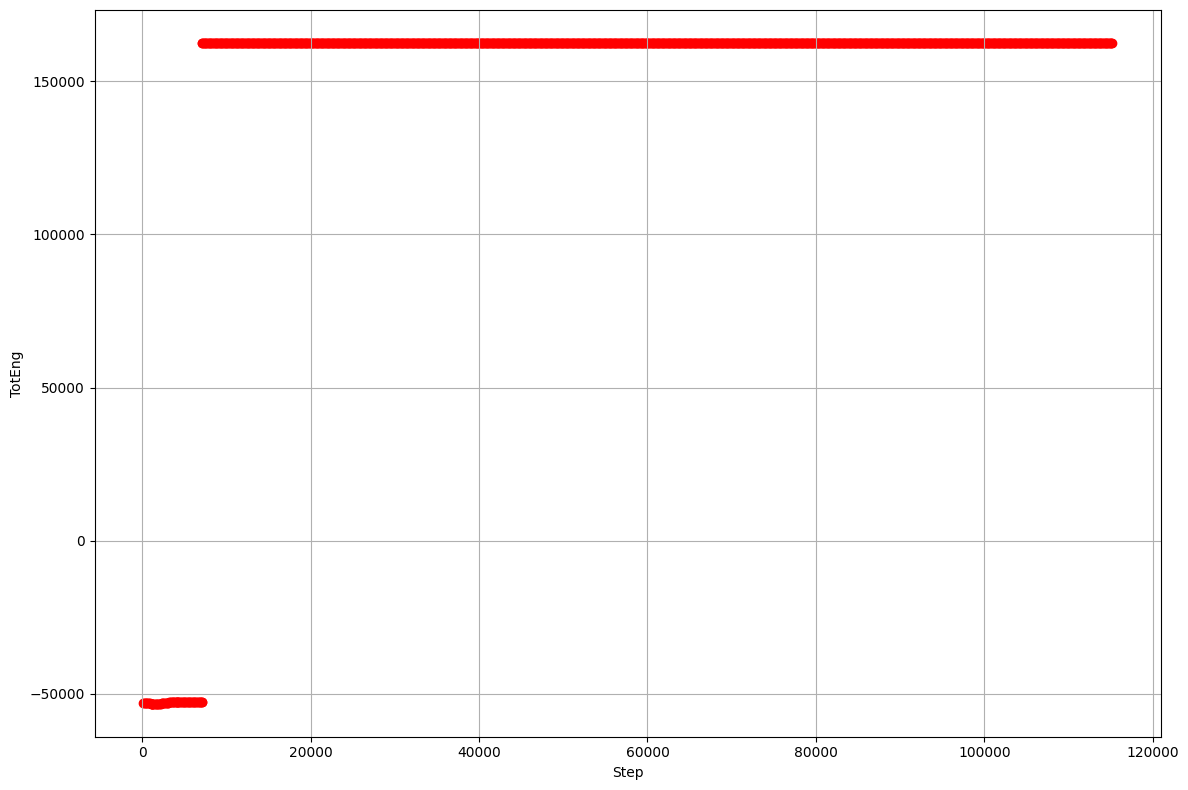

In [125]:
plt.figure(figsize=(12, 8))

plt.scatter(data.Step[data.Time>0], data.TotEng[data.Time>0], label='x', color='r')
plt.xlabel('Step')
plt.ylabel('TotEng')
#plt.title('Среднее количесвто связей')
plt.grid(True)

plt.tight_layout()
plt.show()